In [6]:
from epix import epix
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from tqdm import tqdm
import numpy as np
import bottleneck as bn

In [11]:
# This script is used to generate a beautiful spectrum; 
#fname = "/data/data_20250924_211107.dat"
fname="/data/data_20250618_195816.dat"
det=epix(fname)

In [12]:
# Gain File
gain=np.load("new_gain.npy")
filter=np.load("dark_std_50.npz")["mask"]*np.load("event_mask.npy")

In [13]:
dark_data = det.data[0:2000]              
dark_2D   = bn.nanmedian(dark_data[0:2000], axis=0)  
std_map   = bn.nanstd(dark_data[0:2000], axis=0 )

In [15]:
np.max(det.data)

25460

In [14]:
np.mean(dark_2D)

3203.062118992661

In [28]:
mean_gain= np.mean(gain)
n0 = np.median(std_map)
n1 = 8.6493898
n2 = 7.532470/mean_gain

In [29]:
bins = np.linspace(0,200,202)
centers = (bins[:-1] + bins[1:]) / 2

start_frame=0
#end_frame = nframes
end_frame = 10000
# First Data
hist_total = np.zeros(len(bins)-1, dtype=np.int64)
for i in tqdm(range(start_frame,end_frame)):
    hist_total += det.histogram(i,dark_2D,n0,n1,bins,mask=filter,gain=gain)

hist_total_cs_2 = np.zeros(len(bins)-1, dtype=np.int64)
for i in tqdm(range(start_frame,end_frame)):
    hist_total_cs_2 += det.cs_histogram(i,dark_2D,n0,n1,n2,bins,mask=filter,gain=gain)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:50<00:00, 43.36it/s]


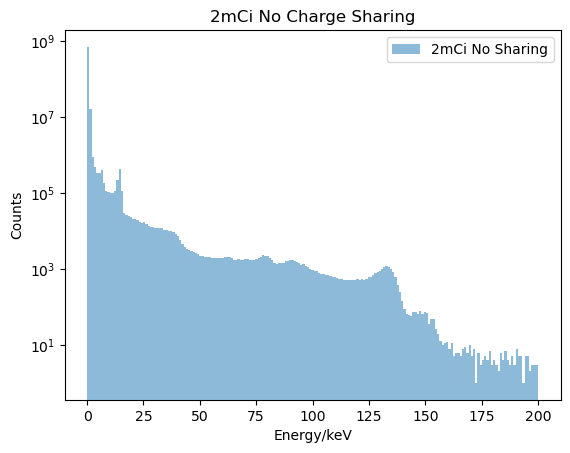

In [30]:
hist_nonzero = np.where(hist_total == 0, 0.1, hist_total)
hist_nonzero_2 = np.where(hist_total_cs_2 == 0, 0.1, hist_total_cs_2)
#hist_nonzero_3 = np.where(hist_total_3 == 0, 0.1, hist_total_3)

fig, ax = plt.subplots()
ax.bar(centers, hist_nonzero,width=(bins[1] - bins[0]),label="2mCi No Sharing",alpha=0.5)
#ax.bar(centers, hist_nonzero_2,width=(bins[1] - bins[0]),label="2mCi Charge Sharing",alpha=0.5)
#ax.bar(centers/mean_gain, hist_nonzero_3,width=(bins[1] - bins[0])/mean_gain,label="sigma and mean Filter",alpha=0.5)
ax.set_yscale('log', nonpositive='clip')
#plt.hist(frame_data.ravel(),bins=201,range=(0,2000),log=True)
ax.set_xlabel("Energy/keV")
ax.set_ylabel("Counts")
ax.legend()
ax.set_title("2mCi No Charge Sharing")
fig.savefig("No_Charge_Correction")
plt.show()

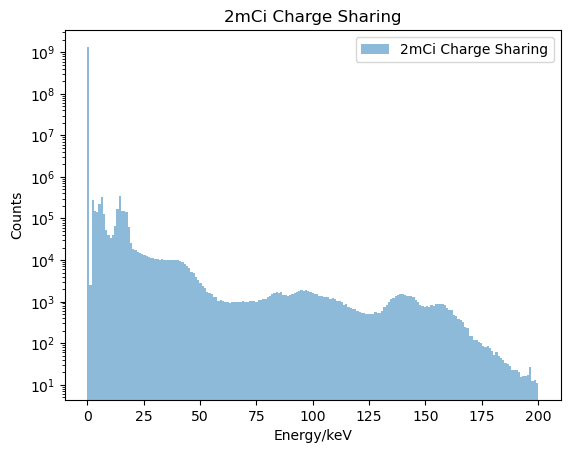

In [31]:
fig, ax = plt.subplots()
#ax.bar(centers, hist_nonzero,width=(bins[1] - bins[0]),label="2mCi No Sharing",alpha=0.5)
ax.bar(centers, hist_nonzero_2,width=(bins[1] - bins[0]),label="2mCi Charge Sharing",alpha=0.5)
#ax.bar(centers/mean_gain, hist_nonzero_3,width=(bins[1] - bins[0])/mean_gain,label="sigma and mean Filter",alpha=0.5)
ax.set_yscale('log', nonpositive='clip')
#plt.hist(frame_data.ravel(),bins=201,range=(0,2000),log=True)
ax.set_xlabel("Energy/keV")
ax.set_ylabel("Counts")
ax.legend()
ax.set_title("2mCi Charge Sharing")
fig.savefig("No_Charge_Correction")
plt.show()

In [32]:
bins = np.linspace(0,20,300)
centers = (bins[:-1] + bins[1:]) / 2



start_frame=0
#end_frame = nframes
end_frame = 10000
# First Data
#hist_total_cs_fine = np.zeros(len(bins)-1, dtype=np.int64)
hist_total_fine = np.zeros(len(bins)-1, dtype=np.int64)
for i in tqdm(range(start_frame,end_frame)):
    #hist_total_cs_fine += det.cs_histogram(i,dark_2D,n0,n1,n2,bins,mask=filter,gain=gain)
    hist_total_fine  += det.histogram(i,dark_2D,n0,n1,bins,mask=filter,gain=gain)


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:30<00:00, 66.49it/s]


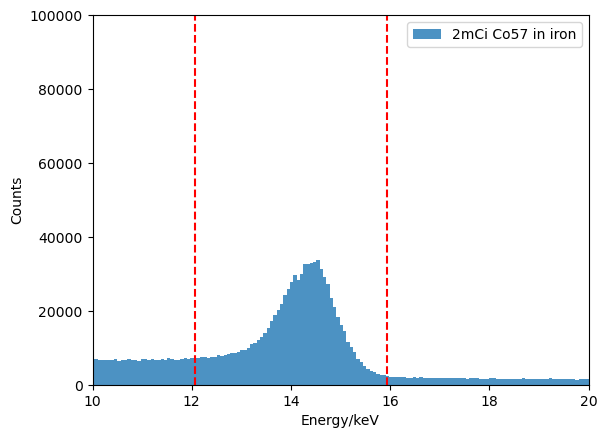

In [33]:
#hist_nonzero_cs_fine = np.where(hist_total_cs_fine == 0, 1, hist_total_cs_fine)
hist_nonzero_fine = np.where(hist_total_fine == 0, 1, hist_total_fine)

plt.style.use('default')
fig, ax = plt.subplots()

#ax.bar(centers, hist_nonzero_cs_fine,width=(bins[1] - bins[0]),label="2mCi Iron Co57",alpha=0.5)
ax.bar(centers, hist_nonzero_fine,width=(bins[1] - bins[0]),label="2mCi Co57 in iron",alpha=0.8)
#ax.set_yscale('log', nonpositive='clip')
#plt.hist(frame_data.ravel(),bins=201,range=(0,2000),log=True)
ax.set_xlabel("Energy/keV")
ax.legend()
ax.set_xlim(10,20)
ax.set_ylim(0,1e5)
#ax.set_yscale('log', nonpositive='clip')
ax.set_ylabel("Counts")

x_line1=181*20/300
x_line2=239*20/300
ax.axvline(x=x_line1,
           color='red',        
           linestyle='--',     
           linewidth=1.5,     
           label=f"x={x_line1:.2f}")
ax.axvline(x=x_line2,
           color='red',        
           linestyle='--',     
           linewidth=1.5,     
           label=f"x={x_line2:.2f}")



fig.savefig("Rough_Analysis_cs_detail",dpi=300)


(537236.0, 134100.0, 4.006234153616704)

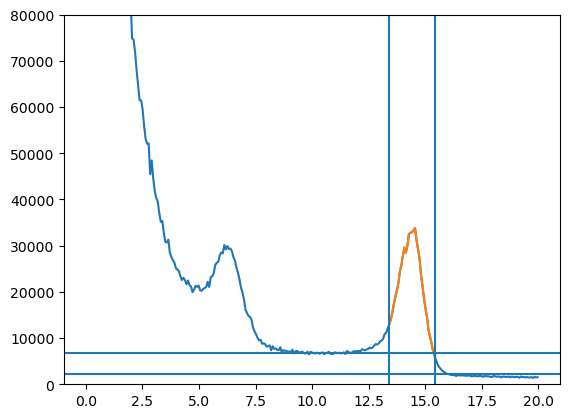

In [34]:
idx1 = 200
idx2 = 230

idx1n = 175
idx2n = 240

plt.plot(centers, hist_nonzero_fine)
plt.plot(centers[idx1:idx2], hist_nonzero_fine[idx1:idx2])
plt.axvline(centers[idx1])
plt.axvline(centers[idx2])
plt.axhline(hist_nonzero_fine[idx1n])
plt.axhline(hist_nonzero_fine[idx2n])
plt.ylim(0,8e4)

s_n = hist_nonzero_fine[idx1:idx2].sum()
n = (hist_nonzero_fine[idx1n]+hist_nonzero_fine[idx2n])/2*(idx2-idx1)
s = s_n-n
s, n, s/n